In [2]:
#importing all neccesary library
import sys
from ipywidgets import interact
import csv
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import sidetable
from pandas_profiling import ProfileReport

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [1]:
!pip install --user --upgrade pip

In [3]:

# !{sys.executable} -m pip install pandas-profiling
# from pandas_profiling import ProfileReport
# !pip install statsmodels --upgrade

### Reading csv file

In [3]:
# get the csv data using pandas
census_dataframe = pd.read_csv("census_19_2022.csv")
#describe data frame
census_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10555 entries, 0 to 10554
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     10555 non-null  int64 
 1   House Number                   10555 non-null  object
 2   Street                         10555 non-null  object
 3   First Name                     10555 non-null  object
 4   Surname                        10555 non-null  object
 5   Age                            10555 non-null  object
 6   Relationship to Head of House  10555 non-null  object
 7   Marital Status                 7993 non-null   object
 8   Gender                         10555 non-null  object
 9   Occupation                     10555 non-null  object
 10  Infirmity                      10555 non-null  object
 11  Religion                       7945 non-null   object
dtypes: int64(1), object(11)
memory usage: 989.7+ KB


In [4]:
#get the size of the data
census_dataframe.shape

(10555, 12)

In [5]:
#dropping the unnamed column 
census_dataframe.drop("Unnamed: 0", axis=1, inplace=True)


In [6]:
census_dataframe.profile_report() #check for all data set

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
#checking for nan entries
census_dataframe.describe(include="all").T

count unique            top   freq
House Number                   10555    242              1    354
Street                         10555    105  Duncan Bridge    798
First Name                     10555    366        Bethany     45
Surname                        10555    715          Smith    340
Age                            10555    113             19    206
Relationship to Head of House  10555     23           Head   3545
Marital Status                  7993      9         Single   3651
Gender                         10555      8         Female   5391
Occupation                     10555   1107        Student   2056
Infirmity                      10555      8           None  10459
Religion                        7945     14           None   3552

In [8]:
#this shows all the data without reducing it
pd.set_option('display.max_rows', 10600)

In [9]:
#checking if the drop column dropped

census_dataframe.head(10)

House Number   Street First Name  Surname Age Relationship to Head of House  \
0            1  Ely Dam   Samantha   Taylor  48                          Head   
1            1  Ely Dam     Darren   Taylor  28                           Son   
2            2  Ely Dam     Sylvia  Hopkins  65                          Head   
3            2  Ely Dam     Gerard  Hopkins  70                       Husband   
4            2  Ely Dam       Ryan  Hopkins  20                           Son   
5            2  Ely Dam      Julia  Hopkins   8                      Daughter   
6            3  Ely Dam   Kayleigh  Hussain  48                          Head   
7            3  Ely Dam       Alan  Edwards  50                       Partner   
8            3  Ely Dam      Wayne  Hussain  17                           Son   
9            3  Ely Dam    Vincent  Hussain  14                           Son   

  Marital Status  Gender                                 Occupation Infirmity  \
0         Single  Female                            Charity officer      None   
1         Single    Male                            Careers adviser      None   
2        Married  Female                                 Unemployed      None   
3        Married    Male                Retired Exhibition designer      None   
4         Single    Male                         University Student      None   
5            NaN  Female                                    Student      None   
6         Single  Female  Sound technician, broadcasting/film/video      None   
7         Single    Male                              IT consultant      None   
8            NaN    Male                                    Student      None   
9            NaN    Male                                    Student      None   

  Religion  
0     None  
1     None  
2     None  
3     None  
4     None  
5      NaN  
6     None  
7     None  
8      NaN  
9      NaN

In [10]:
#getting the dimension of the data after dropping unnamed
census_dataframe.shape

(10555, 11)

In [11]:
#checking columns with error entries
census_dataframe.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   2562
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2610
dtype: int64

#### Check for  Entries value with Unique values

In [12]:
# checking entry values for error
column = ["Relationship to Head of House","Marital Status","Gender","Religion","Occupation","Infirmity","House Number","Street"]
for col in column:
    print(census_dataframe[col].value_counts(dropna=False))
    print("..."*20)

Head                     3545
Son                      1863
Daughter                 1770
Husband                  1081
None                      740
Lodger                    447
Wife                      392
Partner                   302
Granddaughter             108
Grandson                   91
Sibling                    50
Visitor                    37
Cousin                     30
Adopted Son                21
Step-Son                   17
Adopted Daughter           16
Nephew                     15
Step-Daughter              14
Neice                      10
                            2
Adopted Granddaughter       2
Daughter-in-law             1
Adopted Grandson            1
Name: Relationship to Head of House, dtype: int64
............................................................
Single      3651
Married     2963
NaN         2562
Divorced     973
Widowed      380
S              8
D              6
W              6
M              5
               1
Name: Marital Status, dtype: 

###  Street name check 

In [14]:
census_dataframe.stb.freq(["Street"])

Street  count   percent  cumulative_count  \
0            Duncan Bridge    798  7.560398               798   
1         Georgenet Street    785  7.437234              1583   
2              Albans Road    677  6.414022              2260   
3           Atkinson Grove    618  5.855045              2878   
4               Green Lane    558  5.286594              3436   
5      Lavendar Trafficway    369  3.495973              3805   
6         Durhamloop Drive    300  2.842255              4105   
7      Whitehallchain Lane    289  2.738039              4394   
8              Kirk Street    273  2.586452              4667   
9         Armaghchain Lane    235  2.226433              4902   
10           Cooper Street    221  2.093794              5123   
11        Salamander Drive    218  2.065372              5341   
12           Williams Land    202  1.913785              5543   
13         Hunters Circles    168  1.591663              5711   
14           Bradford Lane    166  1.572714              5877   
15            Spencer Cove    149  1.411653              6026   
16           Walton Street    147  1.392705              6173   
17         Dickinson Hills    146  1.383231              6319   
18             James Drive    136  1.288489              6455   
19              Lewis Road    134  1.269541              6589   
20             Ward Course    130  1.231644              6719   
21     Breakfastjar Avenue    126  1.193747              6845   
22            Holly Greens    125  1.184273              6970   
23              Grape Road    118  1.117954              7088   
24       Roberts Stravenue    116  1.099005              7204   
25           Gemini Shores    108  1.023212              7312   
26           Thompson Road    101  0.956892              7413   
27              Lion Drive     99  0.937944              7512   
28         Robinson Avenue     96  0.909522              7608   
29           Arthur Street     95  0.900047              7703   
30            Davey Groves     94  0.890573              7797   
31     Richardson Turnpike     93  0.881099              7890   
32            Carroll Road     93  0.881099              7983   
33           Williams Lane     85  0.805306              8068   
34          Mitchell Roads     83  0.786357              8151   
35           Aquarius Lane     83  0.786357              8234   
36           Newman Avenue     80  0.757935              8314   
37            Barber Drive     79  0.748460              8393   
38            Bray Landing     77  0.729512              8470   
39        Bastille Streets     76  0.720038              8546   
40             Cougar Lane     72  0.682141              8618   
41      Bassenthwaite Port     71  0.672667              8689   
42             Brass River     69  0.653719              8758   
43      Mistletoebag Drive     68  0.644244              8826   
44        Lancelot Islands     68  0.644244              8894   
45      Skylock Expressway     67  0.634770              8961   
46           Scott Freeway     65  0.615822              9026   
47           Farthing Road     60  0.568451              9086   
48                 Ely Dam     60  0.568451              9146   
49              Perth Road     58  0.549503              9204   
50           Mitchell Isle     57  0.540028              9261   
51             Taylor Wall     56  0.530554              9317   
52            Paper Street     56  0.530554              9373   
53         Memorial Avenue     56  0.530554              9429   
54             Holt Street     56  0.530554              9485   
55              Hall Roads     50  0.473709              9535   
56         Victoria Drives     46  0.435812              9581   
57           Lomond Street     45  0.426338              9626   
58           Waterloo Road     43  0.407390              9669   
59            Preston Ways     42  0.397916              9711   
60            Cougar Trace     42  0.397916            

### House Number with object type

In [13]:
#changing the house number from object type to int
census_dataframe["House Number"].replace({"Four":4}, inplace=True)

In [14]:
#check for unique values
census_dataframe["House Number"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

In [15]:
# census_dataframe["House Number"].replace({np.nan:4}, inplace=True)

In [16]:
census_dataframe["House Number"]=census_dataframe["House Number"].astype(int)

### Age errors

In [17]:
for key,value in enumerate( census_dataframe["Age"]):
    try:
        age = int(value)
    except Exception as err:
        print("Wrong type",err, "in line",key)

Wrong type invalid literal for int() with base 10: '58.35426371' in line 5025
Wrong type invalid literal for int() with base 10: '60.35426371' in line 5026
Wrong type invalid literal for int() with base 10: '59.73296755' in line 6791
Wrong type invalid literal for int() with base 10: '71.29223613' in line 8042
Wrong type invalid literal for int() with base 10: '73.29223613' in line 8043
Wrong type invalid literal for int() with base 10: '68.2416306' in line 8050
Wrong type invalid literal for int() with base 10: ' ' in line 8979
Wrong type invalid literal for int() with base 10: '57.71824827' in line 10024
Wrong type invalid literal for int() with base 10: '64.71824827' in line 10025
Wrong type invalid literal for int() with base 10: ' ' in line 10272
Wrong type invalid literal for int() with base 10: ' ' in line 10351
Wrong type invalid literal for int() with base 10: 'eight' in line 10442


In [18]:
#fixing empty space and number written in word
census_dataframe["Age"].replace(to_replace=["eight"," "],value=[8,np.nan], inplace=True)

In [19]:
##Get the average of age column
print("The median for age is : ",census_dataframe["Age"].median())


The median for age is :  35.0


In [20]:
#Checking for the details of the person with null value
census_dataframe[census_dataframe["Age"].isnull()]

House Number         Street First Name  Surname  Age  \
8979             20    Holt Street    Charlie     Reid  NaN   
10272            39  Walton Street      Nigel  Farrell  NaN   
10351             8   Davey Groves     Ashley   Davies  NaN   

      Relationship to Head of House Marital Status Gender  \
8979                        Husband        Married   Male   
10272                           Son            NaN   Male   
10351                          Head         Single   Male   

                    Occupation Infirmity  Religion  
8979   Retired Naval architect      None  Catholic  
10272                    Child      None       NaN  
10351       Academic librarian      None    Muslim

In [21]:
#check for how many peeople in the house hold
age_unknown = census_dataframe[(census_dataframe["House Number"]==39)&(census_dataframe["Street"]=="Walton Street")]
# age_unknown
census_dataframe.drop(age_unknown.index, axis= 0,inplace=True)#dropping the minnor with nan value
census_dataframe=census_dataframe.reset_index(drop = True)

In [22]:
#Filling missing value with median
census_dataframe["Age"].fillna(census_dataframe["Age"].median(),inplace=True)
# census_dataframe["Age"]

In [23]:
for key,value in enumerate( census_dataframe["Age"]):
    try:
        age = float(value) #changing age to float
        census_dataframe.at[key,"Age"] = age
    except Exception as err:
        print("Wrong type",err, "in line",key)

In [24]:
#Changing the age type back to int
census_dataframe["Age"] = census_dataframe["Age"].astype(int)

In [25]:
#Checking the stat of the age
census_dataframe["Age"].describe()

count    10552.000000
mean        35.422195
std         21.379986
min          0.000000
25%         18.000000
50%         35.000000
75%         51.000000
max        105.000000
Name: Age, dtype: float64

In [26]:
census_dataframe.tail(5)

House Number            Street First Name       Surname  Age  \
10547             1  Canterbury Lodge      Molly  Kemp-Sanders   20   
10548             1  Canterbury Lodge     Steven  Kemp-Sanders   19   
10549             1  Canterbury Lodge     Leanne  Kemp-Sanders   15   
10550             1  Canterbury Lodge      Simon  Kemp-Sanders   11   
10551             1  Canterbury Lodge      Jacob  Kemp-Sanders   10   

      Relationship to Head of House Marital Status  Gender  \
10547                      Daughter         Single  Female   
10548                           Son         Single    Male   
10549                      Daughter            NaN  Female   
10550                           Son            NaN    Male   
10551                           Son            NaN    Male   

               Occupation Infirmity   Religion  
10547  University Student      None  Christian  
10548  University Student      None       None  
10549             Student      None        NaN  
10550             Student      None        NaN  
10551             Student      None        NaN

### Relationship to head of house

In [27]:
#correcting empty space in relation to head of house
census_dataframe[census_dataframe["Relationship to Head of House"]==" "]

House Number          Street First Name   Surname  Age  \
1479           128  Atkinson Grove       Mark     Ahmed   13   
9884            26  Capricorn Road      Linda  Robinson   45   

     Relationship to Head of House Marital Status  Gender  \
1479                                          NaN    Male   
9884                                       Single  Female   

                   Occupation Infirmity Religion  
1479                  Student      None      NaN  
9884  Diagnostic radiographer      None     None

In [28]:
census_dataframe[(census_dataframe["House Number"]==128) &(census_dataframe["Street"]=="Atkinson Grove")]

House Number          Street First Name      Surname  Age  \
1477           128  Atkinson Grove     Lesley  Evans-Gough   42   
1478           128  Atkinson Grove     Gerard  Evans-Gough   45   
1479           128  Atkinson Grove       Mark        Ahmed   13   

     Relationship to Head of House Marital Status  Gender  \
1477                          Head        Married  Female   
1478                       Husband        Married    Male   
1479                                          NaN    Male   

                      Occupation Infirmity Religion  
1477  Museum/gallery conservator      None     None  
1478                  Astronomer      None     None  
1479                     Student      None      NaN

In [29]:
census_dataframe[(census_dataframe["House Number"]==26) &(census_dataframe["Street"]=="Capricorn Road")]

House Number          Street First Name   Surname  Age  \
9884            26  Capricorn Road      Linda  Robinson   45   

     Relationship to Head of House Marital Status  Gender  \
9884                                       Single  Female   

                   Occupation Infirmity Religion  
9884  Diagnostic radiographer      None     None

In [30]:
census_dataframe.loc[1479,"Relationship to Head of House"]="Son"

In [31]:
census_dataframe["Relationship to Head of House"].mode()

0    Head
Name: Relationship to Head of House, dtype: object

In [32]:
#changing empty entry to the mode of relationship to head of house

census_dataframe.loc[9884,"Relationship to Head of House"]="Head"


In [123]:
census_dataframe.stb.freq(["Relationship to Head of House"])

Relationship to Head of House  count    percent  cumulative_count  \
0                           Head   3545  33.595527              3545   
1                            Son   1863  17.655421              5408   
2                       Daughter   1770  16.774071              7178   
3                        Husband   1080  10.235027              8258   
4                           None    740   7.012889              8998   
5                         Lodger    447   4.236164              9445   
6                           Wife    392   3.714936              9837   
7                        Partner    302   2.862017             10139   
8                  Granddaughter    108   1.023503             10247   
9                       Grandson     91   0.862396             10338   
10                       Sibling     50   0.473844             10388   
11                       Visitor     37   0.350644             10425   
12                        Cousin     30   0.284306             10455   
13                   Adopted Son     21   0.199014             10476   
14                      Step-Son     17   0.161107             10493   
15              Adopted Daughter     16   0.151630             10509   
16                        Nephew     15   0.142153             10524   
17                 Step-Daughter     14   0.132676             10538   
18                         Neice     10   0.094769             10548   
19         Adopted Granddaughter      2   0.018954             10550   
20               Daughter-in-law      1   0.009477             10551   
21              Adopted Grandson      1   0.009477             10552   

    cumulative_percent  
0            33.595527  
1            51.250948  
2            68.025019  
3            78.260045  
4            85.272934  
5            89.509098  
6            93.224033  
7            96.086050  
8            97.109553  
9            97.971948  
10           98.445792  
11           98.796437  
12           99.080743  
13           99.279757  
14           99.440864  
15           99.592494  
16           99.734647  
17           99.867324  
18           99.962092  
19           99.981046  
20           99.990523  
21          100.000000

In [65]:
#check for relationship to head of house with marital status
census_dataframe.stb.freq(["Relationship to Head of House","Marital Status"])

Relationship to Head of House Marital Status  count    percent  \
0                           Head        Married   1472  13.949962   
1                           Head         Single   1264  11.978772   
2                            Son          minor   1231  11.666035   
3                       Daughter          minor   1094  10.367703   
4                        Husband        Married   1080  10.235027   
5                           None         Single    692   6.557998   
6                           Head       Divorced    493   4.672100   
7                            Son         Single    472   4.473086   
8                       Daughter         Single    467   4.425701   
9                           Wife        Married    392   3.714936   
10                        Lodger         Single    333   3.155800   
11                          Head        Widowed    316   2.994693   
12                       Partner         Single    302   2.862017   
13                      Daughter       Divorced    189   1.791130   
14                           Son       Divorced    138   1.307809   
15                        Lodger       Divorced     94   0.890826   
16                 Granddaughter          minor     79   0.748673   
17                      Grandson          minor     73   0.691812   
18                       Sibling         Single     31   0.293783   
19                       Visitor         Single     30   0.284306   
20                           Son        Widowed     21   0.199014   
21                          None       Divorced     21   0.199014   
22                 Granddaughter         Single     21   0.199014   
23                        Cousin         Single     21   0.199014   
24                          None        Married     20   0.189538   
25                        Lodger        Widowed     20   0.189538   
26                      Daughter        Widowed     20   0.189538   
27                      Step-Son          minor     16   0.151630   
28                   Adopted Son          minor     16   0.151630   
29                        Nephew          minor     15   0.142153   
30                       Sibling       Divorced     14   0.132676   
31                      Grandson         Single     14   0.132676   
32                 Step-Daughter          minor     12   0.113723   
33                         Neice          minor     10   0.094769   
34                        Cousin       Divorced      9   0.085292   
35                 Granddaughter       Divorced      7   0.066338   
36              Adopted Daughter          minor      7   0.066338   
37                          None          minor      6   0.056861   
38              Adopted Daughter         Single      6   0.056861   
39                       Visitor       Divorced      5   0.047384   
40                       Sibling        Widowed      5   0.047384   
41                      Grandson       Divorced      4   0.037908   
42                   Adopted Son         Single      4   0.037908   
43              Adopted Daughter       Divorced      3   0.028431   
44                       Visitor        Widowed      2   0.018954   
45         Adopted Granddaughter          minor      2   0.018954   
46                      Step-Son         Single      1   0.009477   
47                 Step-Daughter         Single      1   0.009477   
48                 Step-Daughter       Divorced      1   0.009477   
49                           Son        Married      1   0.009477   
50                          None        Widowed      1   0.009477   
51                 Granddaughter        Widowed      1   0.009477   
52               Daughter-in-law        Married      1   0.009477   
53                   Adopted Son       Divorced      1   0.009477   
54              Adopted Grandson          minor      1   0.009477   

    cumulative_count  cumulative_percent  
0               1472           13.949962  
1               2736           25.928734  
2        

### Marital status with errror

In [33]:
#marital status have error entries
status ={"S":"Single","D":"Divorced","W":"Widowed","M":"Married"}
census_dataframe["Marital Status"].replace(status,inplace=True)


In [34]:
#checking the count of marital status
census_dataframe["Marital Status"].value_counts()


Single      3659
Married     2966
Divorced     979
Widowed      386
               1
Name: Marital Status, dtype: int64

In [35]:
#replacing the empty column with singe because he is a son and under age
census_dataframe["Marital Status"].unique()

array(['Single', 'Married', nan, 'Divorced', 'Widowed', ' '], dtype=object)

In [36]:
#checking for empty row in marital status
census_dataframe[(census_dataframe["Marital Status"]==" ")]



House Number         Street First Name Surname  Age  \
7529            33  Bradford Lane     Gareth   Hicks   13   

     Relationship to Head of House Marital Status Gender Occupation Infirmity  \
7529                           Son                  Male    Student      None   

     Religion  
7529      NaN

In [37]:
# check for age greater than 16 in marital status with null value and replacing them with 
census_dataframe.loc[(census_dataframe["Marital Status"].isnull())&(census_dataframe["Age"]>16)]

House Number               Street  First Name           Surname  Age  \
8                 3              Ely Dam       Wayne           Hussain   17   
142               6        Duncan Bridge     Dorothy             Lewis   17   
287              43        Duncan Bridge      Connor          Williams   17   
302              47        Duncan Bridge        Sean             Riley   17   
399              72        Duncan Bridge         Guy            Miller   17   
412              77        Duncan Bridge   Francesca            Parkes   17   
612             129        Duncan Bridge       Colin             Lucas   17   
687             150        Duncan Bridge    Mitchell   Richards-Peters   17   
853             194        Duncan Bridge       Marie            Bailey   17   
854             194        Duncan Bridge     Richard            Bailey   17   
884             203        Duncan Bridge    Beverley              Ford   17   
1031              8           Lewis Road     Lindsey             Jones   17   
1072             21           Lewis Road     Russell            Hunter   17   
1114             37           Lewis Road        Alex            Harvey   17   
1141             48           Lewis Road       Debra            Murphy   17   
1519            145       Atkinson Grove      Gerald            Murphy   17   
1545            156       Atkinson Grove      Declan            Davies   17   
1621            181       Atkinson Grove         Amy            Cooper   17   
1712            216       Atkinson Grove      Judith            Thomas   17   
1716            217       Atkinson Grove    Nicholas             Smith   17   
1795             14        Waterloo Road        Jean              Kirk   17   
1874             25     Armaghchain Lane       Grace           Collins   17   
1900             34     Armaghchain Lane      Howard              Daly   17   
2139              1          Taylor Wall      Brenda              Hyde   17   
2147              2          Taylor Wall        Carl               Fox   17   
2156              5          Taylor Wall       Harry           Howells   17   
2208              3          James Drive        Hugh           Freeman   17   
2278             26          James Drive      Sharon            Naylor   17   
2359             10          Poole Wells        Luke             Smith   17   
2384              7      Victoria Drives     Marilyn            Barber   17   
2475              8  Lavendar Trafficway       Shaun          Williams   17   
2495             13  Lavendar Trafficway     Leonard              Mann   17   
2542             23  Lavendar Trafficway   Christine              Shaw   17   
2561             26  Lavendar Trafficway      Nicole       Hobbs-Ellis   17   
2656             38  Lavendar Trafficway      Martin             Davey   17   
2712             46  Lavendar Trafficway     Maureen           Edwards   17   
2774             55  Lavendar Trafficway     Stanley            Hughes   17   
2800              4     Salamander Drive       Reece            Graham   17   
2880             28     Salamander Drive       Aimee             Clark   17   
2894             32     Salamander Drive       Allan             Singh   17   
2930             41     Salamander Drive         Joe            Martin   17   
3097             31    Roberts Stravenue       Paula           Johnson   17   
3105             34    Roberts Stravenue  Jacqueline               Fox   17   
3372              1          Ward Course        Joel             Jones   17   
3585              1         Cougar Trace       Shaun           Kennedy   17   
3774             43        Williams Land       Janet           Buckley   17   
4121             43     Durhamloop Drive      Antony           Roberts   17   
4134              2           Lion Drive       Billy          Charlton   17   
4312              1       Mitchell Roads      Thomas         Griffiths   17   
4374             38       Mitchell Roads      Jordan     

In [38]:
# check for age less than 16 in marital status with null value
census_dataframe.loc[(census_dataframe["Age"]<17)&(census_dataframe["Marital Status"].isnull())]

House Number                 Street   First Name  \
5                 2                Ely Dam        Julia   
9                 3                Ely Dam      Vincent   
10                3                Ely Dam        Dylan   
18                7                Ely Dam        Marie   
30               13                Ely Dam      Deborah   
40               17                Ely Dam    Alexander   
42               18                Ely Dam        Diana   
45               19                Ely Dam        Jenna   
47               20                Ely Dam      Patrick   
48               20                Ely Dam       Joshua   
51               21                Ely Dam         Rhys   
52               21                Ely Dam      Abigail   
53               21                Ely Dam         Sean   
67                4           Magpie Drive         Leon   
68                4           Magpie Drive        Donna   
71                5           Magpie Drive         Jill   
73                6           Magpie Drive      Francis   
77                8           Magpie Drive         Leon   
80                9           Magpie Drive        Nigel   
84               10           Magpie Drive      Rachael   
87                1           Smith Forges         Jack   
99                6           Smith Forges      Dominic   
102               8           Smith Forges        Simon   
117              14           Smith Forges       Adrian   
118              14           Smith Forges        Jayne   
122               1          Duncan Bridge        Shane   
125               2          Duncan Bridge         Rhys   
126               2          Duncan Bridge          Ann   
127               2          Duncan Bridge      Melissa   
134               4          Duncan Bridge         Mary   
135               4          Duncan Bridge          Lee   
143               6          Duncan Bridge    Francesca   
146               7          Duncan Bridge        Abdul   
147               7          Duncan Bridge        Gavin   
152               9          Duncan Bridge          Ian   
153               9          Duncan Bridge       Andrea   
162              11          Duncan Bridge         Leah   
163              11          Duncan Bridge        Abdul   
166              12          Duncan Bridge    Stephanie   
169              13          Duncan Bridge          Zoe   
170              13          Duncan Bridge          Ann   
175              14          Duncan Bridge        Simon   
177              15          Duncan Bridge       Robert   
178              15          Duncan Bridge        Gavin   
184              17          Duncan Bridge    Alexandra   
188              18          Duncan Bridge        Garry   
197              19          Duncan Bridge     Clifford   
206              22          Duncan Bridge        Derek   
207              22          Duncan Bridge         Carl   
208              22          Duncan Bridge       Bethan   
212              24          Duncan Bridge         Lynn   
213              24          Duncan Bridge    Josephine   
223              27          Duncan Bridge        Harry   
224              27          Duncan Bridge      Jessica   
233              30          Duncan Bridge        Mandy   
234              30          Duncan Bridge     Mohammad   
235              30          Duncan Bridge         Katy   
236              30          Duncan Bridge     Nicholas   
237              30          Duncan Bridge       Sheila   
244              32          Duncan Bridge        Holly   
252              34          Duncan Bridge        Helen   
253              34          Duncan Bridge        Clive   
258              35          Duncan Bridge       Jordan   
259              35          Duncan Bridge       Kirsty   
262              36          Duncan Bridge        Maria   
265              37          Duncan Bridge         Liam   
269              38          Duncan Bridge        Jaso

In [39]:
# census_dataframe[(census_dataframe["Marital Status"].isnull())&(census_dataframe["Age"]>16)]

In [40]:
#Handling marital status with nan
census_dataframe["Marital Status"].replace([" ",np.nan],"minor",inplace=True)

In [41]:
census_dataframe["Marital Status"].mode()

0    Single
Name: Marital Status, dtype: object

In [42]:
census_dataframe.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                      0
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2609
dtype: int64

In [43]:
census_dataframe["Relationship to Head of House"].value_counts()

Head                     3545
Son                      1863
Daughter                 1770
Husband                  1080
None                      740
Lodger                    447
Wife                      392
Partner                   302
Granddaughter             108
Grandson                   91
Sibling                    50
Visitor                    37
Cousin                     30
Adopted Son                21
Step-Son                   17
Adopted Daughter           16
Nephew                     15
Step-Daughter              14
Neice                      10
Adopted Granddaughter       2
Daughter-in-law             1
Adopted Grandson            1
Name: Relationship to Head of House, dtype: int64

In [66]:
census_dataframe.stb.freq(["Marital Status"])

Marital Status  count    percent  cumulative_count  cumulative_percent
0         Single   3659  34.675891              3659           34.675891
1        Married   2966  28.108415              6625           62.784306
2          minor   2562  24.279757              9187           87.064064
3       Divorced    979   9.277862             10166           96.341926
4        Widowed    386   3.658074             10552          100.000000

### Gender with error

In [44]:
#Gender with error entries
gender = {"F":"Female","f":"Female","female":"Female","M":"Male","m":"Male","male":"Male"}
census_dataframe["Gender"].replace(gender,inplace=True)

In [45]:
#check if all error on the gender column is fixed
census_dataframe["Gender"].value_counts() 

Female    5501
Male      5051
Name: Gender, dtype: int64

In [46]:
census_dataframe[census_dataframe["Age"]==105]

House Number          Street First Name Surname  Age  \
1632           186  Atkinson Grove    Dominic   Burns  105   
1740           225  Atkinson Grove     Teresa  Bailey  105   
7263             9   Newport Drive      Carly   White  105   

     Relationship to Head of House Marital Status  Gender  \
1632                          Head         Single    Male   
1740                          Head        Widowed  Female   
7263                          Head       Divorced  Female   

                             Occupation Infirmity   Religion  
1632           Retired Ambulance person      None       None  
1740  Retired Building control surveyor      None  Christian  
7263   Retired Technical sales engineer      None  Methodist

### Religion Errors

In [47]:
#Checking for religion with null value
minor_religion_error = (census_dataframe["Religion"].isnull())&(census_dataframe["Age"] < 18)
print(minor_religion_error.sum())


2563


In [48]:
adult_religion_error = (census_dataframe["Religion"].isnull())&(census_dataframe["Age"]>=18)
# census_dataframe = 

In [49]:
#replacing all missing in 
census_dataframe["Religion"].replace(np.nan,"None",inplace=True)

In [50]:
error_relig ={"Nope":"None","Private":"None","Undecided":"None","Sith":"None"}
census_dataframe["Religion"].replace(error_relig,inplace=True)

In [51]:
column = ["Relationship to Head of House","Religion","Infirmity"]
for col in column:
    print(census_dataframe[col].value_counts(dropna=False))
    print("..."*20)

Head                     3545
Son                      1863
Daughter                 1770
Husband                  1080
None                      740
Lodger                    447
Wife                      392
Partner                   302
Granddaughter             108
Grandson                   91
Sibling                    50
Visitor                    37
Cousin                     30
Adopted Son                21
Step-Son                   17
Adopted Daughter           16
Nephew                     15
Step-Daughter              14
Neice                      10
Adopted Granddaughter       2
Daughter-in-law             1
Adopted Grandson            1
Name: Relationship to Head of House, dtype: int64
............................................................
None         6167
Christian    2300
Catholic     1142
Methodist     688
Muslim        146
Sikh           60
Jewish         45
Buddist         2
Agnostic        1
Pagan           1
Name: Religion, dtype: int64
....................

In [63]:
census_dataframe.stb.freq(["Religion"])

Religion  count    percent  cumulative_count  cumulative_percent
0       None   6167  58.443897              6167           58.443897
1  Christian   2300  21.796816              8467           80.240713
2   Catholic   1142  10.822593              9609           91.063306
3  Methodist    688   6.520091             10297           97.583397
4     Muslim    146   1.383624             10443           98.967020
5       Sikh     60   0.568613             10503           99.535633
6     Jewish     45   0.426459             10548           99.962092
7    Buddist      2   0.018954             10550           99.981046
8      Pagan      1   0.009477             10551           99.990523
9   Agnostic      1   0.009477             10552          100.000000

### Infirimty Error

In [52]:
census_dataframe["Infirmity"].isnull().sum()     # check for null value
err = {" ":"None"}
census_dataframe["Infirmity"].replace(err, inplace=True)

In [65]:
census_dataframe.stb.freq(["Infirmity"])

Infirmity  count    percent  cumulative_count  cumulative_percent
0                 None  10472  99.241850             10472           99.241850
1  Physical Disability     24   0.227445             10496           99.469295
2                Blind     14   0.132676             10510           99.601971
3    Unknown Infection     13   0.123199             10523           99.725171
4                 Deaf     12   0.113723             10535           99.838893
5             Disabled     11   0.104246             10546           99.943139
6    Mental Disability      6   0.056861             10552          100.000000

### Occupation errors

In [53]:
census_dataframe["Occupation"].value_counts()

Student                                                                2056
University Student                                                      714
Unemployed                                                              670
Child                                                                   622
Lecturer, further education                                              19
Chiropodist                                                              19
Cytogeneticist                                                           18
Pensions consultant                                                      17
Research scientist (medical)                                             17
Building control surveyor                                                17
Further education lecturer                                               17
Forensic scientist                                                       16
Learning disability nurse                                                16
Copywriter, 

In [54]:
census_dataframe["Occupation"].unique()

array(['Charity officer', 'Careers adviser', 'Unemployed', ...,
       'Retired Lecturer, higher education',
       'Retired Engineer, aeronautical',
       'Retired Television production assistant'], dtype=object)

In [55]:
census_dataframe["Occupation"].mode()

0    Student
Name: Occupation, dtype: object

In [56]:
#check for empty space in the occupation column
census_dataframe[(census_dataframe["Occupation"]==" ")&(census_dataframe["Age"]>20)]

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [57]:
#changing the empty space in the occupation column to Child after cheking the age
census_dataframe.loc[6150,"Occupation"]="Child"

In [58]:
census_dataframe.loc[9277,"Occupation"] = "Student" # changing the empty space in the occupation column tothe mode 

In [60]:
def create_emp_status(column):
        if column.startswith("Retired"):
            retired = column.split()[0]
            return retired
        elif column=="Student":
            return "Student"
        
        elif column=="PhD Student":
            return "PhD Student"

        elif column=="University Student":
            return "University Student"
        elif column=="Unemployed":
            return "Unemployed"
        elif column=="Child":
            return "Child"

        else:
            return "Employed"

        
        
census_dataframe["Employee_status"] = census_dataframe["Occupation"].apply(create_emp_status)


In [61]:
# census_dataframe.drop("Employee Status", axis= 1, inplace=True)
census_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10552 entries, 0 to 10551
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   10552 non-null  int32 
 1   Street                         10552 non-null  object
 2   First Name                     10552 non-null  object
 3   Surname                        10552 non-null  object
 4   Age                            10552 non-null  int32 
 5   Relationship to Head of House  10552 non-null  object
 6   Marital Status                 10552 non-null  object
 7   Gender                         10552 non-null  object
 8   Occupation                     10552 non-null  object
 9   Infirmity                      10552 non-null  object
 10  Religion                       10552 non-null  object
 11  Employee_status                10552 non-null  object
dtypes: int32(2), object(10)
memory usage: 906.9+ KB


In [62]:
census_dataframe["Employee_status"].describe()

count        10552
unique           7
top       Employed
freq          5648
Name: Employee_status, dtype: object

In [66]:
# df[['NA_Sales','EU_Sales','JP_Sales', 'Genre']].groupby('Genre').sum().stb.subtotal()

census_dataframe.stb.freq(["Employee_status"],sort_cols=True)

Employee_status  count    percent  cumulative_count  cumulative_percent
0               Child    623   5.904094               623            5.904094
1            Employed   5648  53.525398              6271           59.429492
2         PhD Student     12   0.113723              6283           59.543215
3             Retired    828   7.846854              7111           67.390068
4             Student   2057  19.493935              9168           86.884003
5          Unemployed    670   6.349507              9838           93.233510
6  University Student    714   6.766490             10552          100.000000

In [70]:
#check for migration
census_dataframe[(census_dataframe["Relationship to Head of House"]=="Visitor")&
                 (census_dataframe["Gender"]=="Female")&(census_dataframe["Marital Status"]=="Single")].count()

House Number                     16
Street                           16
First Name                       16
Surname                          16
Age                              16
Relationship to Head of House    16
Marital Status                   16
Gender                           16
Occupation                       16
Infirmity                        16
Religion                         16
Employee_status                  16
dtype: int64

In [71]:
# check for number of male migration and female
census_dataframe[(census_dataframe["Relationship to Head of House"]=="Visitor")&
                 (census_dataframe["Gender"]=="Male")&(census_dataframe["Marital Status"]=="Single")].count()

House Number                     14
Street                           14
First Name                       14
Surname                          14
Age                              14
Relationship to Head of House    14
Marital Status                   14
Gender                           14
Occupation                       14
Infirmity                        14
Religion                         14
Employee_status                  14
dtype: int64

In [73]:
#check for the number of divorces in the population
census_dataframe[(census_dataframe["Marital Status"]=="Divorced")].count()

House Number                     979
Street                           979
First Name                       979
Surname                          979
Age                              979
Relationship to Head of House    979
Marital Status                   979
Gender                           979
Occupation                       979
Infirmity                        979
Religion                         979
Employee_status                  979
dtype: int64

In [75]:
census_dataframe[(census_dataframe["Marital Status"]=="")&(census_dataframe["Age"]<=20)]

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion, Employee_status]
Index: []

In [77]:
census_dataframe.stb.freq(["Occupation"])

Occupation  count    percent  \
0                                               Student   2057  19.493935   
1                                    University Student    714   6.766490   
2                                            Unemployed    670   6.349507   
3                                                 Child    623   5.904094   
4                           Lecturer, further education     19   0.180061   
5                                           Chiropodist     19   0.180061   
6                                        Cytogeneticist     18   0.170584   
7                          Research scientist (medical)     17   0.161107   
8                                   Pensions consultant     17   0.161107   
9                            Further education lecturer     17   0.161107   
10                            Building control surveyor     17   0.161107   
11                            Learning disability nurse     16   0.151630   
12                                   Forensic scientist     16   0.151630   
13                              Copywriter, advertising     16   0.151630   
14                                      Camera operator     16   0.151630   
15                               Applications developer     16   0.151630   
16                      Television production assistant     15   0.142153   
17                Product/process development scientist     15   0.142153   
18                                      Producer, radio     15   0.142153   
19                                         Neurosurgeon     15   0.142153   
20                               Museum/gallery curator     15   0.142153   
21                       Manufacturing systems engineer     15   0.142153   
22                               Leisure centre manager     15   0.142153   
23                         IT technical support officer     15   0.142153   
24                                   Editor, film/video     15   0.142153   
25                              Data processing manager     15   0.142153   
26                                    Company secretary     15   0.142153   
27                                 Community pharmacist     15   0.142153   
28                         Community development worker     15   0.142153   
29                                  Colour technologist     15   0.142153   
30                                           Air broker     15   0.142153   
31                               Surveyor, hydrographic     14   0.132676   
32                              Scientist, audiological     14   0.132676   
33                              Presenter, broadcasting     14   0.132676   
34                                       Police officer     14   0.132676   
35                                   Petroleum engineer     14   0.132676   
36                                     Marine scientist     14   0.132676   
37                                   Jewellery designer     14   0.132676   
38                                        IT consultant     14   0.132676   
39                                    Food technologist     14   0.132676   
40                            Engineer, technical sales     14   0.132676   
41                                Engineer, maintenance     14   0.132676   
42                          Engineer, building services     14   0.132676   
43                             Customer service manager     14   0.132676   
44                             Computer games developer     14   0.132676   
45                                  Clinical biochemist     14   0.132676   
46                  Chartered public finance accountant     14   0.132676   
47                                        Advice worker     14   0.132676   
48                             Advertising art director     14   0.132676   
49                                         Video editor     13   0.123199   
50                         Trade union research officer     13   0.123199   
51                                Theatre

# VISUALIZATION

In [ ]:
#changing graph size to default
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)


Text(0.5, 1.0, 'Distribution of Age vs Marital Status')

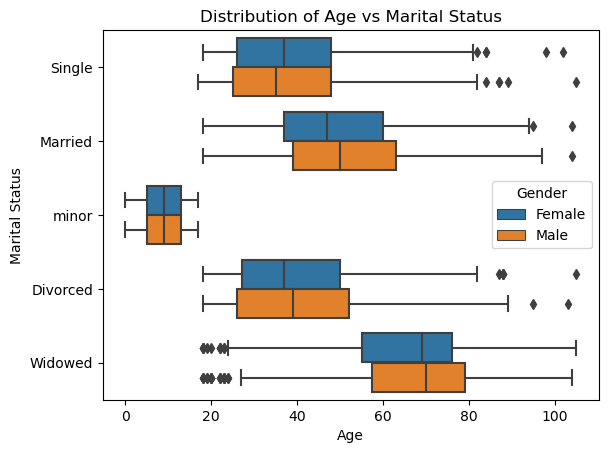

In [80]:
sns.boxplot(census_dataframe,hue="Gender",y="Marital Status",x="Age")
plt.title("Distribution of Age vs Marital Status")

Text(0.5, 1.0, 'Distribution of Employee status and Gender')

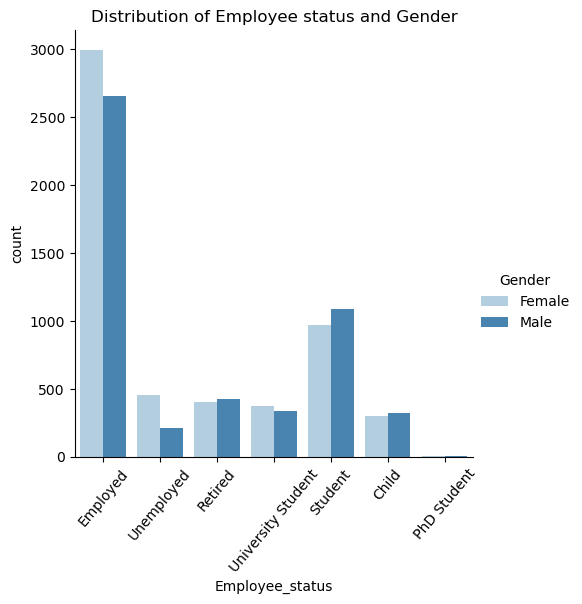

In [79]:
#plot for employee count against gender
sns.catplot(census_dataframe,x="Employee_status",kind="count",hue="Gender",palette="Blues")
plt.xticks(rotation = 50)
plt.title("Distribution of Employee status and Gender")

Text(0.5, 1.0, 'Distribution of Age vs Employee Status')

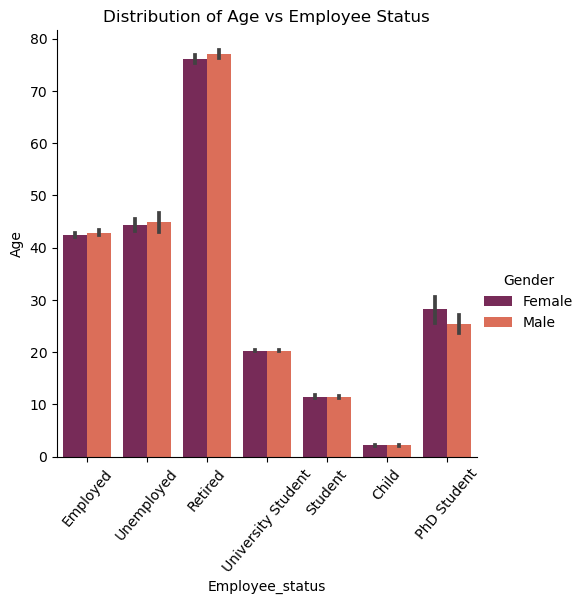

In [82]:
#plot of employee status against Age
sns.catplot(census_dataframe,y="Age",x="Employee_status",kind="bar",hue="Gender",palette="rocket")
plt.xticks(rotation = 50)
plt.title("Distribution of Age vs Employee Status")

In [73]:
# # check for employee status by gender
# emp_status = sns.catplot(data=census_dataframe, x="Employee_status",hue="Gender",kind="count",palette="Paired")
# plt.title("Distribution of Employement Status",fontsize=20)
# plt.xticks(rotation = 50)
# plt.savefig("employe_status",pad_inches=0)

#### Age pyramid

In [103]:
census_dataframe["Age Group"]=''
for key, value in enumerate(census_dataframe["Age"]):
    if value in range(5):
        census_dataframe.loc[key,"Age Group"]="0-4"
    elif value in range(5,10):
        census_dataframe.loc[key,"Age Group"]="5-9"
    elif value in range(10,15):
        census_dataframe.loc[key,"Age Group"]="10-14"
    elif value in range(15,20):
        census_dataframe.loc[key,"Age Group"]="15-19"
    elif value in range(20,25):
        census_dataframe.loc[key,"Age Group"]="20-24"
    elif value in range(25,30):
        census_dataframe.loc[key,"Age Group"]="25-29"
    elif value in range(30,35):
        census_dataframe.loc[key,"Age Group"]="30-34"
    elif value in range(35,40):
        census_dataframe.loc[key,"Age Group"]="35-39"
    elif value in range(40,45):
        census_dataframe.loc[key,"Age Group"]="40-44"
    elif value in range(45,50):
        census_dataframe.loc[key,"Age Group"]="45-49"
    elif value in range(50,55):
        census_dataframe.loc[key,"Age Group"]="50-54"
    elif value in range(55,60):
        census_dataframe.loc[key,"Age Group"]="55-59"
    elif value in range(60,65):
        census_dataframe.loc[key,"Age Group"]="60-64"
    elif value in range(65,70):
        census_dataframe.loc[key,"Age Group"]="65-69"
    elif value in range(70,75):
        census_dataframe.loc[key,"Age Group"]= "70-74"
    elif value in range(75,80):
        census_dataframe.loc[key,"Age Group"]="75-79"
    elif value in range(80, 85):
        census_dataframe.loc[key,"Age Group"]="80-84"
    elif value in range(85,90):
        census_dataframe.loc[key,"Age Group"]="85-89"
    elif value in range(90,95):
        census_dataframe.loc[key,"Age Group"]="90-94"
    elif value in range(95,100):
        census_dataframe.loc[key,"Age Group"]="95-99"
    else:
        census_dataframe.loc[key,"Age Group"]="100+"
        

In [84]:
census_dataframe['Age Group'].value_counts()

35-39    890
40-44    862
15-19    825
20-24    824
45-49    778
30-34    757
5-9      751
10-14    725
25-29    720
50-54    691
0-4      622
55-59    585
60-64    450
65-69    349
70-74    272
75-79    191
80-84    142
85-89     82
100+      13
90-94     12
95-99     11
Name: Age Group, dtype: int64

In [85]:
age_group=['100+','95-99','90-94','85-89','80-84','75-79','70-74','65-69','60-64','55-59','50-54','45-49','40-44','35-39','30-34','25-29','20-24','15-19','10-14','5-9','0-4']

In [86]:
female_census=census_dataframe[(census_dataframe["Gender"]=="Female")]
male_census=census_dataframe[(census_dataframe["Gender"]=="Male")]


In [87]:
#get the unique value of age group and create a dataframe
age_df = pd.DataFrame({"AgeGroup": census_dataframe["Age Group"].unique()}) 
# age_df

In [88]:
male_df = male_census["Age Group"].value_counts()  #add 
female_df = female_census["Age Group"].value_counts()



In [93]:
# house_occupant=(census_dataframe["Street"].value_counts())
# house_occupant

In [94]:
female_df.unique()

array([505, 465, 445, 444, 426, 407, 379, 359, 355, 338, 301, 300, 238,
       186, 143,  97,  67,  31,   7,   6,   2], dtype=int64)

In [95]:
for value in list(male_df.index):
    update1 = age_df.index[age_df["AgeGroup"]==value].tolist()
    age_df.loc[update1,"Male"]= male_df[value]

In [96]:
for value in list(female_df.index):
    update2 = age_df.index[age_df["AgeGroup"]==value].tolist()
    age_df.loc[update2,"Female"]= female_df[value]

In [97]:
female_under_age=census_dataframe[(census_dataframe["Age"]==0)&(census_dataframe["Gender"]=="Female")].count()
male_under_age=census_dataframe[(census_dataframe["Age"]==0)&(census_dataframe["Gender"]=="Male")].count()
print(male_under_age)
print(female_under_age)
census_dataframe.count()

House Number                     55
Street                           55
First Name                       55
Surname                          55
Age                              55
Relationship to Head of House    55
Marital Status                   55
Gender                           55
Occupation                       55
Infirmity                        55
Religion                         55
Employee_status                  55
Age Group                        55
dtype: int64
House Number                     45
Street                           45
First Name                       45
Surname                          45
Age                              45
Relationship to Head of House    45
Marital Status                   45
Gender                           45
Occupation                       45
Infirmity                        45
Religion                         45
Employee_status                  45
Age Group                        45
dtype: int64


House Number                     10552
Street                           10552
First Name                       10552
Surname                          10552
Age                              10552
Relationship to Head of House    10552
Marital Status                   10552
Gender                           10552
Occupation                       10552
Infirmity                        10552
Religion                         10552
Employee_status                  10552
Age Group                        10552
dtype: int64

In [98]:
age_df

AgeGroup   Male  Female
0     45-49  333.0   445.0
1     25-29  341.0   379.0
2     65-69  163.0   186.0
3     70-74  129.0   143.0
4     20-24  380.0   444.0
5       5-9  396.0   355.0
6     50-54  332.0   359.0
7     15-19  418.0   407.0
8     10-14  387.0   338.0
9     95-99    9.0     2.0
10    60-64  212.0   238.0
11    35-39  385.0   505.0
12    30-34  331.0   426.0
13    40-44  397.0   465.0
14    80-84   75.0    67.0
15      0-4  322.0   300.0
16    75-79   94.0    97.0
17    55-59  284.0   301.0
18     100+    6.0     7.0
19    85-89   51.0    31.0
20    90-94    6.0     6.0

In [99]:
age_df['Female'] = age_df["Female"]*(-10)
age_df["Male"] =age_df['Male']*(10)

Text(0.5, 1.0, 'Population pyramid for census')

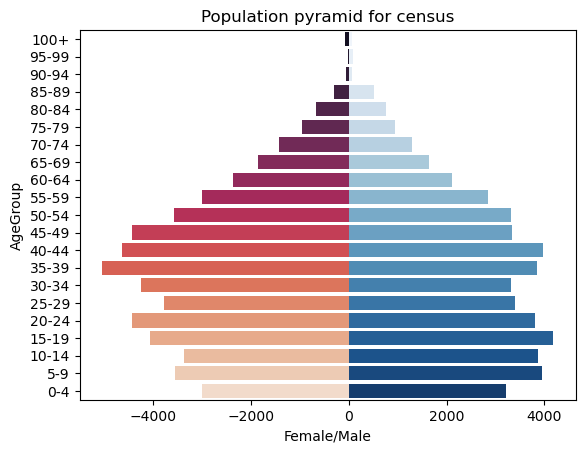

In [100]:
male_plot = sns.barplot(x='Male',y='AgeGroup', data= age_df,order=age_group,palette="Blues")
female_plot = sns.barplot(x="Female",y= "AgeGroup",data=age_df,order=age_group,palette="rocket")
plt.xlabel("Female/Male")
plt.title("Population pyramid for census")

#### statistics 

In [102]:
census_dataframe.stb.freq(["Age Group"],sort_cols=True)

Age Group  count   percent  cumulative_count  cumulative_percent
0        0-4    622  5.894617               622            5.894617
1      10-14    725  6.870735              1347           12.765353
2       100+     13  0.123199              1360           12.888552
3      15-19    825  7.818423              2185           20.706975
4      20-24    824  7.808946              3009           28.515921
5      25-29    720  6.823351              3729           35.339272
6      30-34    757  7.173995              4486           42.513268
7      35-39    890  8.434420              5376           50.947688
8      40-44    862  8.169067              6238           59.116755
9      45-49    778  7.373010              7016           66.489765
10       5-9    751  7.117134              7767           73.606899
11     50-54    691  6.548522              8458           80.155421
12     55-59    585  5.543973              9043           85.699393
13     60-64    450  4.264594              9493           89.963988
14     65-69    349  3.307430              9842           93.271418
15     70-74    272  2.577710             10114           95.849128
16     75-79    191  1.810083             10305           97.659212
17     80-84    142  1.345716             10447           99.004928
18     85-89     82  0.777104             10529           99.782032
19     90-94     12  0.113723             10541           99.895754
20     95-99     11  0.104246             10552          100.000000

In [104]:
census_dataframe.groupby("Marital Status").describe()

House Number                                                \
                      count       mean        std  min   25%   50%    75%   
Marital Status                                                              
Divorced              979.0  44.352400  48.635170  1.0  10.5  28.0  55.00   
Married              2966.0  48.536750  53.824502  1.0  11.0  28.0  59.00   
Single               3659.0  46.486198  49.916398  1.0  12.0  28.0  58.00   
Widowed               386.0  37.414508  43.269967  1.0  11.0  23.5  43.75   
minor                2562.0  48.899688  52.838778  1.0  12.0  29.0  63.00   

                          Age                                                \
                  max   count       mean        std   min   25%   50%   75%   
Marital Status                                                                
Divorced        236.0   979.0  40.501532  16.514007  18.0  27.0  38.0  51.0   
Married         240.0  2966.0  50.129804  16.359464  18.0  38.0  48.0  62.0   
Single          241.0  3659.0  37.719596  14.060094  17.0  26.0  36.0  48.0   
Widowed         225.0   386.0  64.002591  20.755534  18.0  55.5  70.0  77.0   
minor           239.0  2562.0   8.867291   5.060542   0.0   5.0   9.0  13.0   

                       
                  max  
Marital Status         
Divorced        105.0  
Married         104.0  
Single          105.0  
Widowed         105.0  
minor            17.0

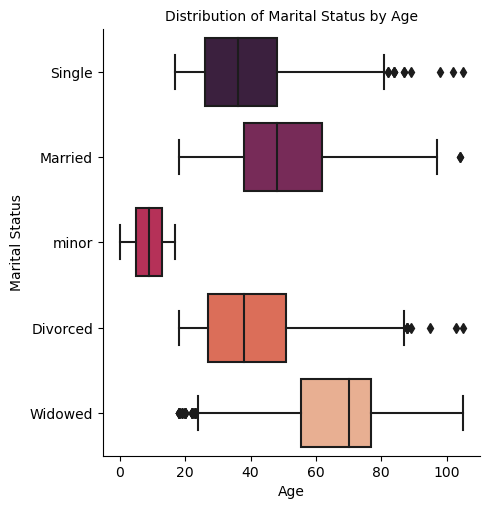

In [105]:
Marital = sns.catplot(data=census_dataframe, x="Age",y= "Marital Status", kind="box",palette="rocket")
plt.title("Distribution of Marital Status by Age",fontsize=10 )
plt.savefig("MaritalPlot")

#### age and Religon

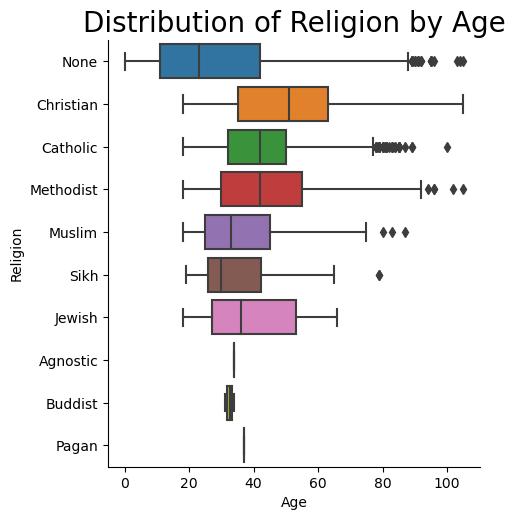

In [106]:
sns.catplot(data=census_dataframe, x="Age",y= "Religion", kind="box")
plt.title("Distribution of Religion by Age",fontsize=20 )
plt.savefig("ReligionPlot")

In [114]:
census_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10552 entries, 0 to 10551
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   10552 non-null  int32 
 1   Street                         10552 non-null  object
 2   First Name                     10552 non-null  object
 3   Surname                        10552 non-null  object
 4   Age                            10552 non-null  int32 
 5   Relationship to Head of House  10552 non-null  object
 6   Marital Status                 10552 non-null  object
 7   Gender                         10552 non-null  object
 8   Occupation                     10552 non-null  object
 9   Infirmity                      10552 non-null  object
 10  Religion                       10552 non-null  object
 11  Employee_status                10552 non-null  object
 12  Age Group                      10552 non-null  object
dtypes

In [115]:
census_dataframe.describe().T

count       mean        std  min   25%   50%   75%    max
House Number  10552.0  47.118745  51.466961  1.0  11.0  28.0  58.0  241.0
Age           10552.0  35.422195  21.379986  0.0  18.0  35.0  51.0  105.0

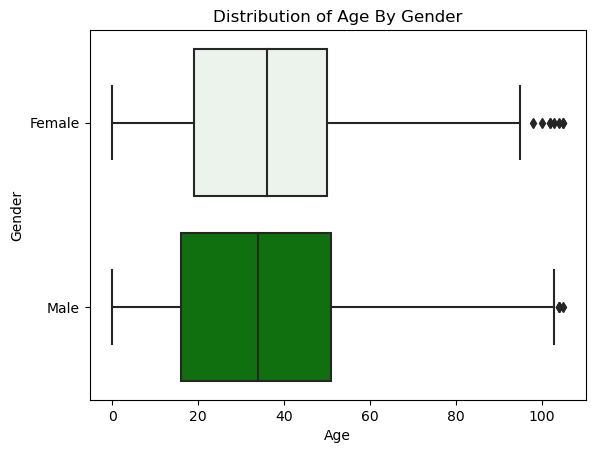

In [113]:
sns.boxplot(census_dataframe,x="Age", y= "Gender",palette="light:g")
plt.title("Distribution of Age By Gender")
plt.savefig("AgeSexPlot",fontsize=20)

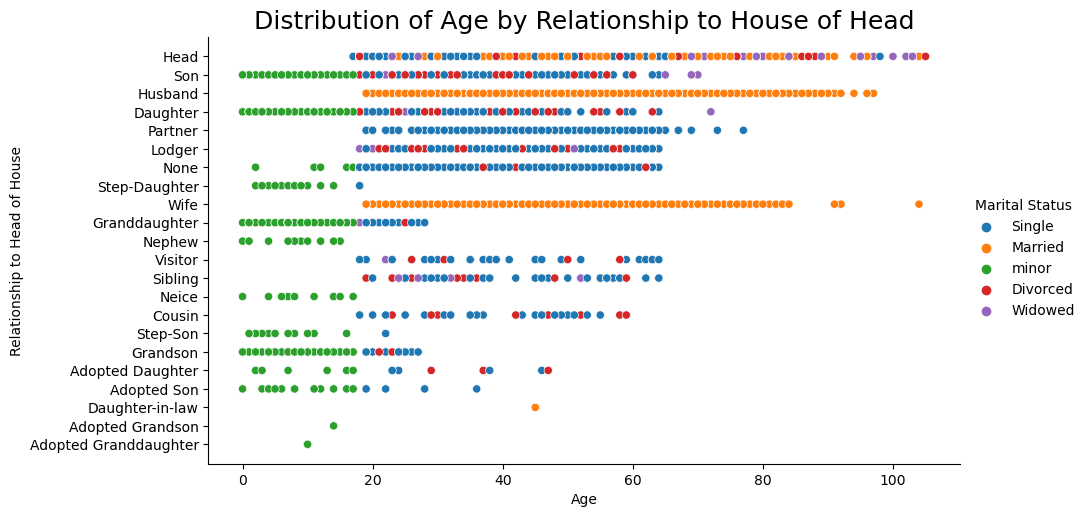

In [111]:
age_relation=sns.relplot(data=census_dataframe,y="Relationship to Head of House", x ="Age",hue="Marital Status",aspect=2)
plt.title("Distribution of Age by Relationship to House of Head",fontsize=18)
plt.savefig("age_relation")

In [112]:
census_dataframe.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [119]:

census_dataframe.corr

<bound method DataFrame.corr of        House Number                 Street   First Name  \
0                 1                Ely Dam     Samantha   
1                 1                Ely Dam       Darren   
2                 2                Ely Dam       Sylvia   
3                 2                Ely Dam       Gerard   
4                 2                Ely Dam         Ryan   
5                 2                Ely Dam        Julia   
6                 3                Ely Dam     Kayleigh   
7                 3                Ely Dam         Alan   
8                 3                Ely Dam        Wayne   
9                 3                Ely Dam      Vincent   
10                3                Ely Dam        Dylan   
11                4                Ely Dam       Marion   
12                4                Ely Dam       Jordan   
13                5                Ely Dam      Jeffrey   
14                6                Ely Dam      Natalie   
15                6     

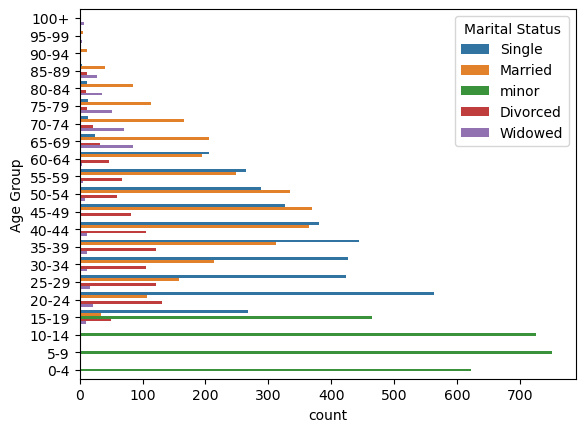

In [120]:
sns.countplot(census_dataframe,y="Age Group",hue="Marital Status" ,order=age_group)


In [122]:
# sns.countplot(census_dataframe,y="Age Group",hue="Marital Status" ,order=age_group)

In [ ]:
(census_dataframe["Age"]<65).value_counts()